# Isolation Forest #

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
import numpy as np
from copy import deepcopy

In [150]:
import warnings
warnings.filterwarnings('ignore')

In [153]:
# purely plot text color
params = {"text.color" : "orange",
          "xtick.color" : "orange",
          "ytick.color" : "orange",
          "axes.labelcolor" : "orange",
          "font.size": 12}
plt.rcParams.update(params)

# iTree on a gaussian #

In [1]:
from sklearn.ensemble import IsolationForest

In [154]:
n = 1000
cluster = np.random.normal(0, 1, (n, 2))

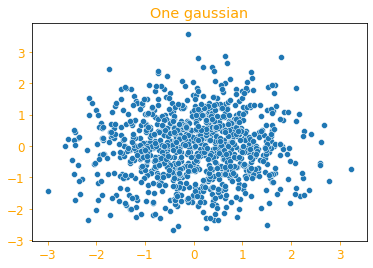

In [155]:
sns.scatterplot(cluster[:, 0], cluster[:, 1])
plt.title('One gaussian')
plt.show()

In [235]:
from itertools import product

In [251]:
grid_x = np.linspace(-4, 4, 100)
grid_y = np.linspace(-4, 4, 100)
grid = np.array(list(product(grid_x, grid_y)))

In [190]:
itree = IsolationForest(n_estimators=1)
itree.fit(cluster)
scores = itree.score_samples(grid).reshape(100, 100).T

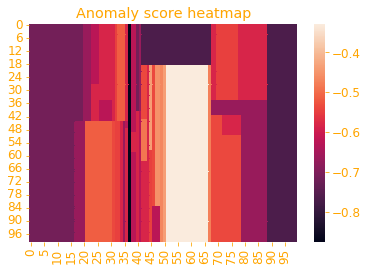

In [193]:
sns.heatmap(scores)
plt.title('Anomaly score heatmap')
plt.show()

Question - why is there one big homogenous rectangle corresponding to low anomaly probability? Shouldn't the tree near its deepest points be fractured a lot, resulting in a multicolored chaotic landscape?

# c(n) demonstration #

In [121]:
X = np.array([[0, 0], [1, 0], [0, 1], [0, 2]])

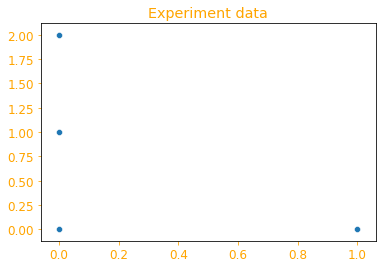

In [122]:
sns.scatterplot(X[:, 0], X[:, 1])
plt.title('Experiment data')
plt.show()

In [86]:
from sklearn.ensemble import IsolationForest

In [92]:
itree = IsolationForest(n_estimators=1)
it.fit(X)

IsolationForest(n_estimators=1)

In [93]:
it.score_samples(X)

array([-0.32529681, -0.68774367, -0.32529681, -0.47299135])

In [94]:
grid = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2]])

In [95]:
scores = it.score_samples(grid).reshape(2, 3)

In [96]:
scores

array([[-0.32529681, -0.32529681, -0.47299135],
       [-0.68774367, -0.68774367, -0.68774367]])

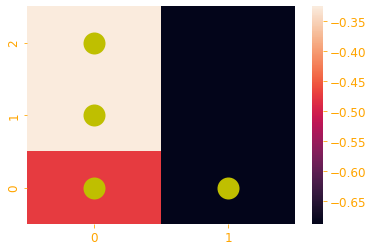

In [117]:
sns.heatmap(scores.T)
locs, labels = plt.yticks()
plt.yticks(locs, [2, 1, 0])
for obj in X:
    plt.plot(obj[0] + 0.5,
    2.5 - obj[1],
    'o',
    ms=20, 
    mec='y',
    mfc='y', 
    mew=2
    )
plt.show()

The isolation tree is built as follows:
 - root node : x > 0.5
 - - leaf with [1, 0]
 - - y > 0.5
 - - - leaf with [0, 0]
 - - - leaf with [0, 1], [0, 2]

Two leaves at max depth get different scores, because the one with two objects gets bigger c(n) bonus.

# Contamination #

In [283]:
pr = itree.predict(grid)
np.where(pr == 1)[0].shape

(1746,)

In [284]:
sc = itree.score_samples(grid)
np.where(sc > -0.5)[0].shape

(1746,)

# Ensembling by hand #

In [194]:
itree_2 = IsolationForest(n_estimators=1)
itree_2.fit(cluster)
scores_2 = itree_2.score_samples(grid).reshape(100, 100).T

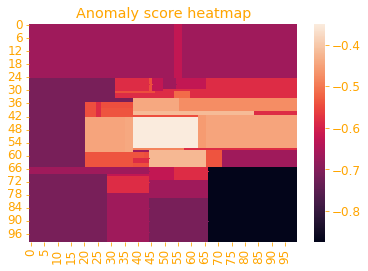

In [197]:
sns.heatmap(scores_2)
plt.title('Anomaly score heatmap')
plt.show()

Let us now depict ensemble's heatmap

In [198]:
scores_ensemble = (scores + scores_2) / 2

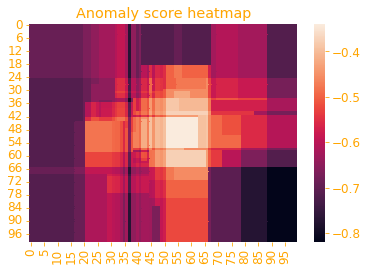

In [199]:
sns.heatmap(scores_ensemble)
plt.title('Anomaly score heatmap')
plt.show()

That's significantly better!

Let's repeat the process once more:

In [201]:
itree_3 = IsolationForest(n_estimators=1)
itree_3.fit(cluster)
scores_3 = itree_3.score_samples(grid).reshape(100, 100).T

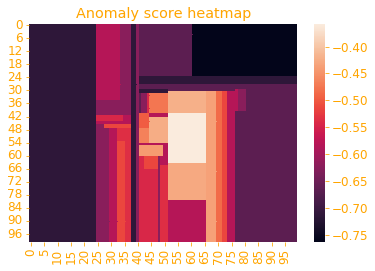

In [204]:
sns.heatmap(scores_3)
plt.title('Anomaly score heatmap')
plt.show()

In [205]:
itree_4 = IsolationForest(n_estimators=1)
itree_4.fit(cluster)
scores_4 = itree_4.score_samples(grid).reshape(100, 100).T

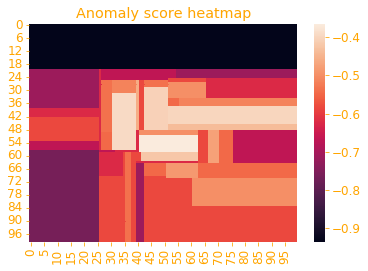

In [208]:
sns.heatmap(scores_4)
plt.title('Anomaly score heatmap')
plt.show()

In [210]:
scores_ensemble_4 = (scores + scores_2 + scores_3 + scores_4) / 4

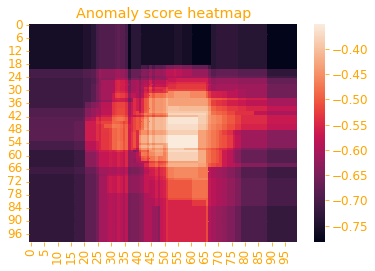

In [211]:
sns.heatmap(scores_ensemble_4)
plt.title('Anomaly score heatmap')
plt.show()

# iForest with multiple trees, as it should be used #

The answer to question 1 is, we are interested in easily separable objects only, as for the other ones, we do not care, how exactly very solid they are. So there is no reason to build the three to its deepest point, and by default we stop building new leafs as we reachs depth equal log(number of objects).

In [215]:
iforest = IsolationForest(n_estimators=100)
iforest.fit(cluster)
predictions = iforest.predict(cluster)
outliers = np.where(predictions == -1)[0]

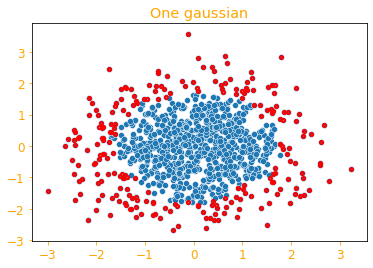

In [216]:
sns.scatterplot(cluster[:, 0], cluster[:, 1])
circle_rad = 1.5
for outlier in outliers:
    plt.plot(cluster[outlier, 0],
    cluster[outlier, 1],
    'o',
    ms=circle_rad * 2, 
    mec='r',
    mfc='none', 
    mew=2
    )
plt.title('One gaussian')
plt.show()

In [218]:
grid_scores = iforest.score_samples(grid)

In [219]:
grid_scores = grid_scores.reshape(100, 100).T

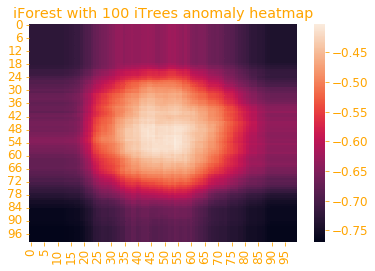

In [221]:
sns.heatmap(grid_scores)
plt.title('iForest with 100 iTrees anomaly heatmap')
plt.show()